In [130]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [131]:
def line_from_points(x1, y1, x2, y2):
    m = (y2 - y1) / (x2 - x1)
    b = y1 - (m * x1)
    return m, b

In [132]:
def dist_line_point(a, b, c, x0, y0):
    ### Equation of line given by ax + by + c = 0
    ### Point defined as (x0, y0)
    return abs(a * x0 + b * y0 + c) / math.sqrt(a**2 + b**2)

In [133]:
def area_triangle(x1, y1, x2, y2, x3, y3):
    return abs((x1 * (y2 - y3) + x2 * (y3 - y1) + x3 * (y1 - y2)) / 2.0)

In [134]:
def is_outside(x1, y1, x2, y2, x3, y3, x, y):
    A = area_triangle(x1, y1, x2, y2, x3, y3)
    A1 = area_triangle(x, y, x2, y2, x3, y3)
    A2 = area_triangle(x1, y1, x, y, x3, y3)
    A3 = area_triangle(x1, y1, x2, y2, x, y)
    return A != (A1 + A2 + A3)

In [135]:
def is_above_line(y, m, x, b):
    yy = m*np.array(x) + b
    return y - yy > 0

In [136]:
def intersection_of_lines(m0, b0, m1, b1):
    x = (b1 - b0) / (m0 - m1)
    y = m0 * x + b0
    return x, y

In [508]:
def dist_btw_pts(x1, y1, x2, y2):
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

In [185]:
def QuickHullRecursive(x, y, x0, y0, x1, y1, m, b):
    # Recursive part of QuickHull function
    # Input: x - array of x coordinates of set of points
    #        y - array of y coordinates of set of points
    #        x0, y0, x1, y1 - x and y coordinates of line used to split points
    #        m, b - slope and y-intercept, respectively, of line used to split points
    # Output: Set of points making up the convex hull
    
    # Base Case:
    # If the function is passed an empty array, simply return
    if len(x) == 0:
        return
    
    # If the function is passed an array of length 1, return those coordinates
    elif len(x) == 1:
        return [[x[0], y[0]]]
    
    # Recursive Case
    else:
        # Find point with furthest perpendicular distance from line
        # This point is part of the convex hull
        max_d = 0
        index = 0
        for i in range(len(x)):
            dist = dist_line_point(m, -1, b, x[i], y[i])
            if dist > max_d:
                max_d = dist
                index = i
                
        # All of the points inside the triangle made by x0, y0, x1, y1, and the point at the
        # furthest distance cannot be a part of the hull, so remove them
        out_tri = []
        for i in range(len(x)):
            out_tri.append(is_outside(x0, y0, x1, y1, x[index], y[index], x[i], y[i]))
        new_x = np.array(x)[out_tri]
        new_y = np.array(y)[out_tri]
        
        # We need the equation for the line going from the input line to the furthest point
        m0 = -1/m
        b0 = y[index] - (m0 * x[index])
        x2, y2 = intersection_of_lines(m, b, m0, b0)
        
        # Now that we have the new line, we split the data by which points fall above and below the line
        above = is_above_line(new_y, m0, new_x, b0)
        top_x = new_x[above]
        top_y = new_y[above]
        bottom_x = new_x[np.logical_not(above)]
        bottom_y = new_y[np.logical_not(above)]
        
        if len(top_x) == 1 and len(bottom_x) == 1:
            return [[x[index], y[index]], [top_x[0], top_y[0]], [bottom_x[0], bottom_y[0]]]
        elif len(top_x) == 0:
            [[x[index], y[index]]] + QuickHullRecursive2(bottom_x, bottom_y, x[index], y[index], x2, y2, m0, b0)
        elif len(bottom_x) == 0:
            [[x[index], y[index]]] + QuickHullRecursive2(top_x, top_y, x[index], y[index], x2, y2, m0, b0)
        else:
            return ([[x[index], y[index]]] + 
                    QuickHullRecursive(top_x, top_y, x[index], y[index], x2, y2, m0, b0) + 
                    QuickHullRecursive(bottom_x, bottom_y, x[index], y[index], x2, y2, m0, b0))

In [170]:
def QuickHullRecursive2(x, y, x0, y0, x1, y1, m, b):
    # Recursive part of QuickHull function
    # Input: x - array of x coordinates of set of points
    #        y - array of y coordinates of set of points
    #        x0, y0, x1, y1 - x and y coordinates of line used to split points
    #        m, b - slope and y-intercept, respectively, of line used to split points
    # Output: Set of points making up the convex hull
    

    # Find point with furthest perpendicular distance from line
    # This point is part of the convex hull
    if len(x) == 0:
        return
    elif len(x) == 1:
        return [[x[0], y[0]]]
    else:
        print('called')
        max_d = 0
        index = 0
        for i in range(len(x)):
            dist = dist_line_point(m, -1, b, x[i], y[i])
            if dist > max_d:
                max_d = dist
                index = i

        # All of the points inside the triangle made by x0, y0, x1, y1, and the point at the
        # furthest distance cannot be a part of the hull, so remove them
        out_tri = []
        for i in range(len(x)):
            out_tri.append(is_outside(x0, y0, x1, y1, x[index], y[index], x[i], y[i]))
        new_x = np.array(x)[out_tri]
        new_y = np.array(y)[out_tri]

        if len(new_x) == 0:
            return [[x[index], y[index]]]
        elif len(new_x) == 1:
            return [[x[index], y[index]], [new_x[0], new_y[0]]]
        else:
            # We need the equation for the line going from the input line to the furthest point
            m0 = -1/m
            b0 = y[index] - (m0 * x[index])
            x2, y2 = intersection_of_lines(m, b, m0, b0)

            # Now that we have the new line, we split the data by which points fall above and below the line
            above = is_above_line(new_y, m0, new_x, b0)
            top_x = new_x[above]
            top_y = new_y[above]
            bottom_x = new_x[np.logical_not(above)]
            bottom_y = new_y[np.logical_not(above)]

            if len(top_x) == 1 and len(bottom_x) == 1:
                return [[x[index], y[index]], [top_x[0], top_y[0]], [bottom_x[0], bottom_y[0]]]
            elif len(top_x) == 0:
                [[x[index], y[index]]] + QuickHullRecursive2(bottom_x, bottom_y, x[index], y[index], x2, y2, m0, b0)
            elif len(bottom_x) == 0:
                [[x[index], y[index]]] + QuickHullRecursive2(top_x, top_y, x[index], y[index], x2, y2, m0, b0)
            else:
                return ([[x[index], y[index]]] + 
                        QuickHullRecursive2(top_x, top_y, x[index], y[index], x2, y2, m0, b0) + 
                        QuickHullRecursive2(bottom_x, bottom_y, x[index], y[index], x2, y2, m0, b0))

In [531]:
def QuickHullRecursive3(x, y, x0, y0, x1, y1, m, b):
    # Recursive part of QuickHull function
    # Input: x - array of x coordinates of set of points
    #        y - array of y coordinates of set of points
    #        x0, y0, x1, y1 - x and y coordinates of line used to split points
    #        m, b - slope and y-intercept, respectively, of line used to split points
    # Output: Set of points making up the convex hull
    

    # Find point with furthest perpendicular distance from line
    # This point is part of the convex hull
    if len(x) == 0:
        print('none')
        return []
    elif len(x) == 1:
        print('one')
        print([[x[0], y[0]]])
        return [[x[0], y[0]]]
    else:
        print('many')
        max_d = 0
        index = 0
        for i in range(len(x)):
            dist = dist_line_point(m, -1, b, x[i], y[i])
            if dist > max_d:
                max_d = dist
                index = i

        # All of the points inside the triangle made by x0, y0, x1, y1, and the point at the
        # furthest distance cannot be a part of the hull, so remove them
        out_tri = []
        for i in range(len(x)):
            out_tri.append(is_outside(x0, y0, x1, y1, x[index], y[index], x[i], y[i]))
        new_x = np.array(x)[out_tri]
        new_y = np.array(y)[out_tri]

        if len(new_x) == 0:
            print('many none')
            print(index)
            print([[x[index], y[index]]])
            return [[x[index], y[index]]]
        elif len(new_x) == 1:
            print('many one')
            print([[x[index], y[index]]] + [[new_x[0], new_y[0]]])
            return [[x[index], y[index]]] +  [[new_x[0], new_y[0]]]
        else:
            # We need the equation for the line going from the input line to the furthest point
            #m0 = -1/m
            #b0 = y[index] - (m0 * x[index])
            #x2, y2 = intersection_of_lines(m, b, m0, b0)
            
            ml, bl = line_from_points(x0, y0, x[index], y[index])
            
            mr, br = line_from_points(x[index], y[index], x1, y1)

            # Now that we have the new line, we split the data by which points fall above and below the line
            #above = is_above_line(new_y, m0, new_x, b0)
            #top_x = new_x[above]
            #top_y = new_y[above]
            #bottom_x = new_x[np.logical_not(above)]
            #bottom_y = new_y[np.logical_not(above)]
            left_x = new_x[new_x<x[index]]
            left_y = new_y[new_x<x[index]]
            right_x = new_x[new_x>x[index]]
            right_y = new_y[new_x>x[index]]

            return ([[x[index], y[index]]] + 
                        QuickHullRecursive3(left_x, left_y, x0, y0, x[index], y[index], ml, bl) + 
                        QuickHullRecursive3(right_x, right_y, x1, y1, x[index], y[index], mr, br))

In [451]:
def QuickHull(x, y):
    # Function to find the smallest convex polygon for a set of points that contains all the given points
    # Input: x - x coordinates of set of points
    #        y - y coordinates of set of points
    # Output: Set of points making up the convex hull
    
    # Start by finding the x-coordinates with smallest and largest values, as these are always included
    min_index = np.argmin(x)
    max_index = np.argmax(x)
    
    # Now find the equation of the line connecting the smallest and largest x-coordinates
    m, b = line_from_points(x[min_index], y[min_index], 
                            x[max_index], y[max_index])
    
    # Remove the min and max x-coordinates from the set of points
    if min_index < max_index:
        new_x = np.append(np.append(x[:min_index], x[min_index+1:max_index]), x[max_index+1:])
        new_y = np.append(np.append(y[:min_index], y[min_index+1:max_index]), y[max_index+1:])
    else:
        new_x = np.append(np.append(x[:max_index], x[max_index+1:min_index]), x[min_index+1:])
        new_y = np.append(np.append(y[:max_index], y[max_index+1:min_index]), y[min_index+1:])
        
    # Split the data by which points fall above and below the line
    above = is_above_line(new_y, m, new_x, b)
    top_x = new_x[above]
    top_y = new_y[above]
    bottom_x = new_x[np.logical_not(above)]
    bottom_y = new_y[np.logical_not(above)]
    
    #-y = -mx - b
    #mx - y + b = 0
    hull = np.array([[x[min_index], y[min_index]], [x[max_index], y[max_index]]])
    pts = (QuickHullRecursive3(top_x, top_y, 
                              x[min_index], y[min_index], 
                              x[max_index], y[max_index], 
                              m, b) + 
          QuickHullRecursive3(bottom_x, bottom_y, 
                              x[min_index], y[min_index], 
                              x[max_index], y[max_index], 
                              m, b))
#    hull = np.append(hull, 
#                     QuickHullRecursive3(top_x, top_y, 
#                                         x[min_index], y[min_index], 
#                                         x[max_index], y[max_index], 
#                                         m, b), axis=0)# + 
                     #QuickHullRecursive3(bottom_x, bottom_y, 
                      #                   x[min_index], y[min_index], 
                       #                  x[max_index], y[max_index], 
                        #                 m, b), axis=0)
#    hull = np.append(hull, QuickHullRecursive3(bottom_x, bottom_y, 
#                                              x[min_index], y[min_index], 
#                                              x[max_index], y[max_index], 
#                                              m, b), axis=0)
    return np.append(hull, pts, axis=0)

In [165]:
def order_points(points):
    avg_x = np.mean(points[:, 0])
    avg_y = np.mean(points[:, 1])
    thetas = []
    for i in range(len(points)):
        a = points[i][0] - avg_x
        o = points[i][1] - avg_y
        theta = math.atan2(o, a) * 180 / math.pi
        if theta > 0:
            thetas.append(theta)
        else:
            thetas.append(360+theta)
    return thetas

In [167]:
def plot_hull(x, y, hull):
    thetas = np.array([order_points(hull)])
    hull = np.append(hull, thetas.T, 1)
    hull = hull[np.argsort(hull[:, 2])]
    for i in range(len(hull)-1):
        plt.plot([hull[i][0], hull[i+1][0]], [hull[i][1], hull[i+1][1]], 'r')
    plt.plot([hull[-1][0], hull[0][0]], [hull[-1][1], hull[0][1]], 'r')
    plt.scatter(x, y)

In [307]:
x = np.array([1, 4, 7, 10, 11, 11, 11, 12, 15, 16, 18, 18, 19, 22])
y = np.array([6, 15, 7, 13, 6, 18, 21, 10, 18, 6, 3, 12, 15, 19])

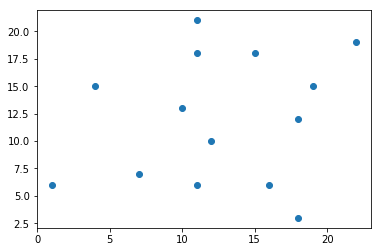

In [308]:
plt.scatter(x, y)

In [309]:
h = QuickHull(x, y)

many
many one
[[11, 21], [4, 15]]
many
many none
4
[[18, 3]]


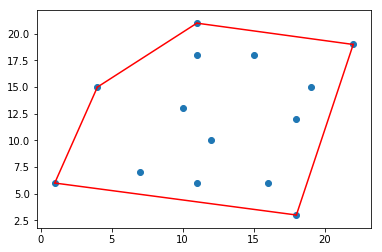

In [310]:
plot_hull(x, y, h)

In [552]:
#random.seed(1)
x = np.array([random.randint(-100, 100) for i in range(25)])
y = np.array([random.randint(-100, 100) for i in range(25)])

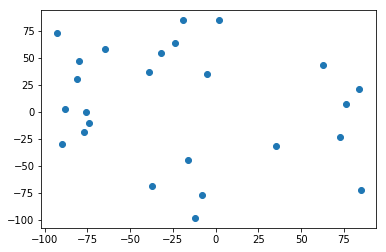

In [553]:
plt.scatter(x, y)

In [554]:
h1 = QuickHull(x, y)

many
many
many one
[[2, 85], [-19, 85]]
many
many none
0
[[84, 21]]
many
many
many none
0
[[-90, -30]]
none


In [555]:
h1

array([[-93,  73],
       [ 85, -72],
       [ 63,  44],
       [  2,  85],
       [-19,  85],
       [ 84,  21],
       [-12, -98],
       [-90, -30]])

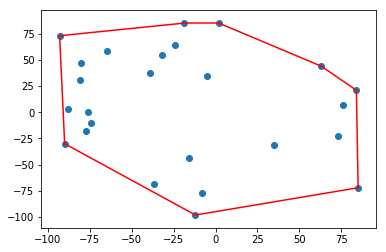

In [556]:
plot_hull(x, y, h1)

In [509]:
dist_btw_pts(-98, -77, -96, -1)

76.02631123499285

In [510]:
dist_btw_pts(-98, -77, -91, -31) + dist_btw_pts(-91, -31, -96, -1)

76.94337314801847

In [370]:
def test(x):
    if x == 0:
        return [[1, 2]]
    else:
        return []

In [361]:
b = np.array([[3, 4], [5, 6]])
b

array([[3, 4],
       [5, 6]])

In [371]:
[[1, 2]] + [[3, 4]] + test(1)

[[1, 2], [3, 4]]

In [380]:
np.append(b, [[1, 2]] + [[3, 4]] + test(1), axis=0)

array([[3, 4],
       [5, 6],
       [1, 2],
       [3, 4]])

In [407]:
[[87, 89], [74, 86]]

[[87, 89], [74, 86]]

array([ 51, -23, -73, -73,  -5,   6])

In [482]:
x

array([ 18,  53, -13,  36,  29, -58, -93, -63, -36,  75, -44,  44, -66,
       -72, -53])

In [483]:
y

array([ 96,   5,  86,  58, -88, -75,  39,  74, -32,  82, -73, -48, -34,
       -83,  61])

In [478]:
x<0

array([False, False,  True, False, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True])

In [480]:
x[x<x[5]]

array([-93, -63, -66, -72])

In [481]:
y[x<x[5]]

array([ 39,  74, -34, -83])